In [6]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import json
DIRS = ['../KMEANS_BA', '../DBSCAN_BA']

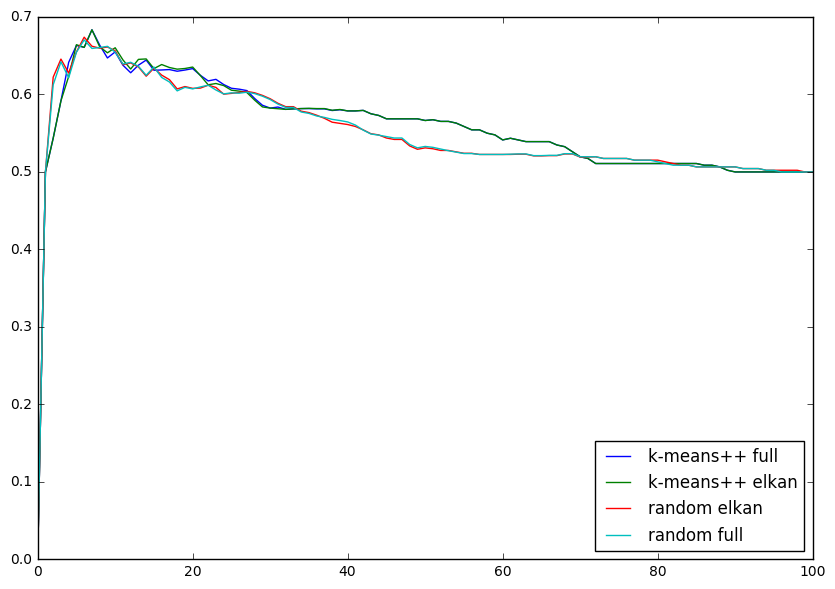

In [4]:
# KMEANS
directory = DIRS[0]
files = os.listdir(directory)
results = {}
n_clust= 100
for f_name in files:
    with open(os.path.join(directory, f_name)) as f:
        js_f = json.load(f)
    n_clusters = js_f['meta']['args']['n_clusters']
    init = js_f['meta']['args']['init']
    alg = js_f['meta']['args']['algorithm']
    scores = js_f['result']['result']
    key = init + ' ' + alg
    if key not in results:
        results[key] = [0]*(n_clust+1)
    results[key][n_clusters] = np.mean(scores)

# plotting
plt.figure(figsize=(10, 7))
# plt.ylim([0,0.6])
for key in results.keys():
    plt.plot(results[key], label=key)
plt.legend(loc=4)
plt.show()

# tak wygląda DBSCAN:
```python 
{
    "meta": {
        "args": {
            "algorithm": "ball_tree", 
            "base_fname": "../../DBSCAN/{n_jobs:4,algorithm:ball_tree,metric:braycurtis,eps:0.0001,p:10,leaf_size:10,min_samples:3}", 
            "eps": 0.0001, 
            "leaf_size": 10, 
            "metric": "braycurtis", 
            "min_samples": 3, 
            "n_jobs": 4, 
            "p": 10.0, 
            "save_logs": false, 
            "save_results": true
        }, 
        "base_fname": "../../DBSCAN/{n_jobs:4,algorithm:ball_tree,metric:braycurtis,eps:0.0001,p:10,leaf_size:10,min_samples:3}", 
        "cmd": "/home/pocha/chemical-similarity-clustering/chesicl/experiment/dbscan_cv_iteration.py --n_jobs 4 --algorithm ball_tree --metric braycurtis --eps 0.0001 --p 10.0 --leaf_size 10 --min_samples 3", 
        "start": "2017_02_08", 
        "time": 0.11709880828857422
    }, 
    "result": {
        "result": [
            0.13411078717201166
        ]
    }
}
```

In [11]:
# DBSCAN
directory = DIRS[1]
files = os.listdir(directory)
results = {}
for f_name in files:
    with open(os.path.join(directory, f_name)) as f:
        js_f = json.load(f)
    alg = js_f['meta']['args']['algorithm']
    metric = js_f['meta']['args']['metric']
    eps = js_f['meta']['args']['eps']
    leaf_size = js_f['meta']['args']['leaf_size']
    min_samples = js_f['meta']['args']['min_samples']
    p = js_f['meta']['args']['p']
    result = js_f['result']['result']
    
    zniwo = {'eps':eps, 'leaf_size':leaf_size, 'min_samples':min_samples, 'p':p, 'result':result}
    if alg not in results.keys():
        results[alg]={metric: [zniwo]}
    elif metric not in results[alg]:
        results[alg][metric]=[zniwo]
    else:
        results[alg][metric].append(zniwo)



kd_tree
possible metrics: [u'chebyshev', u'minkowski', u'euclidean', u'l2', u'l1', u'cityblock', u'manhattan']
generating plot for: eps
generating plot for: leaf_size
generating plot for: min_samples
generating plot for: p


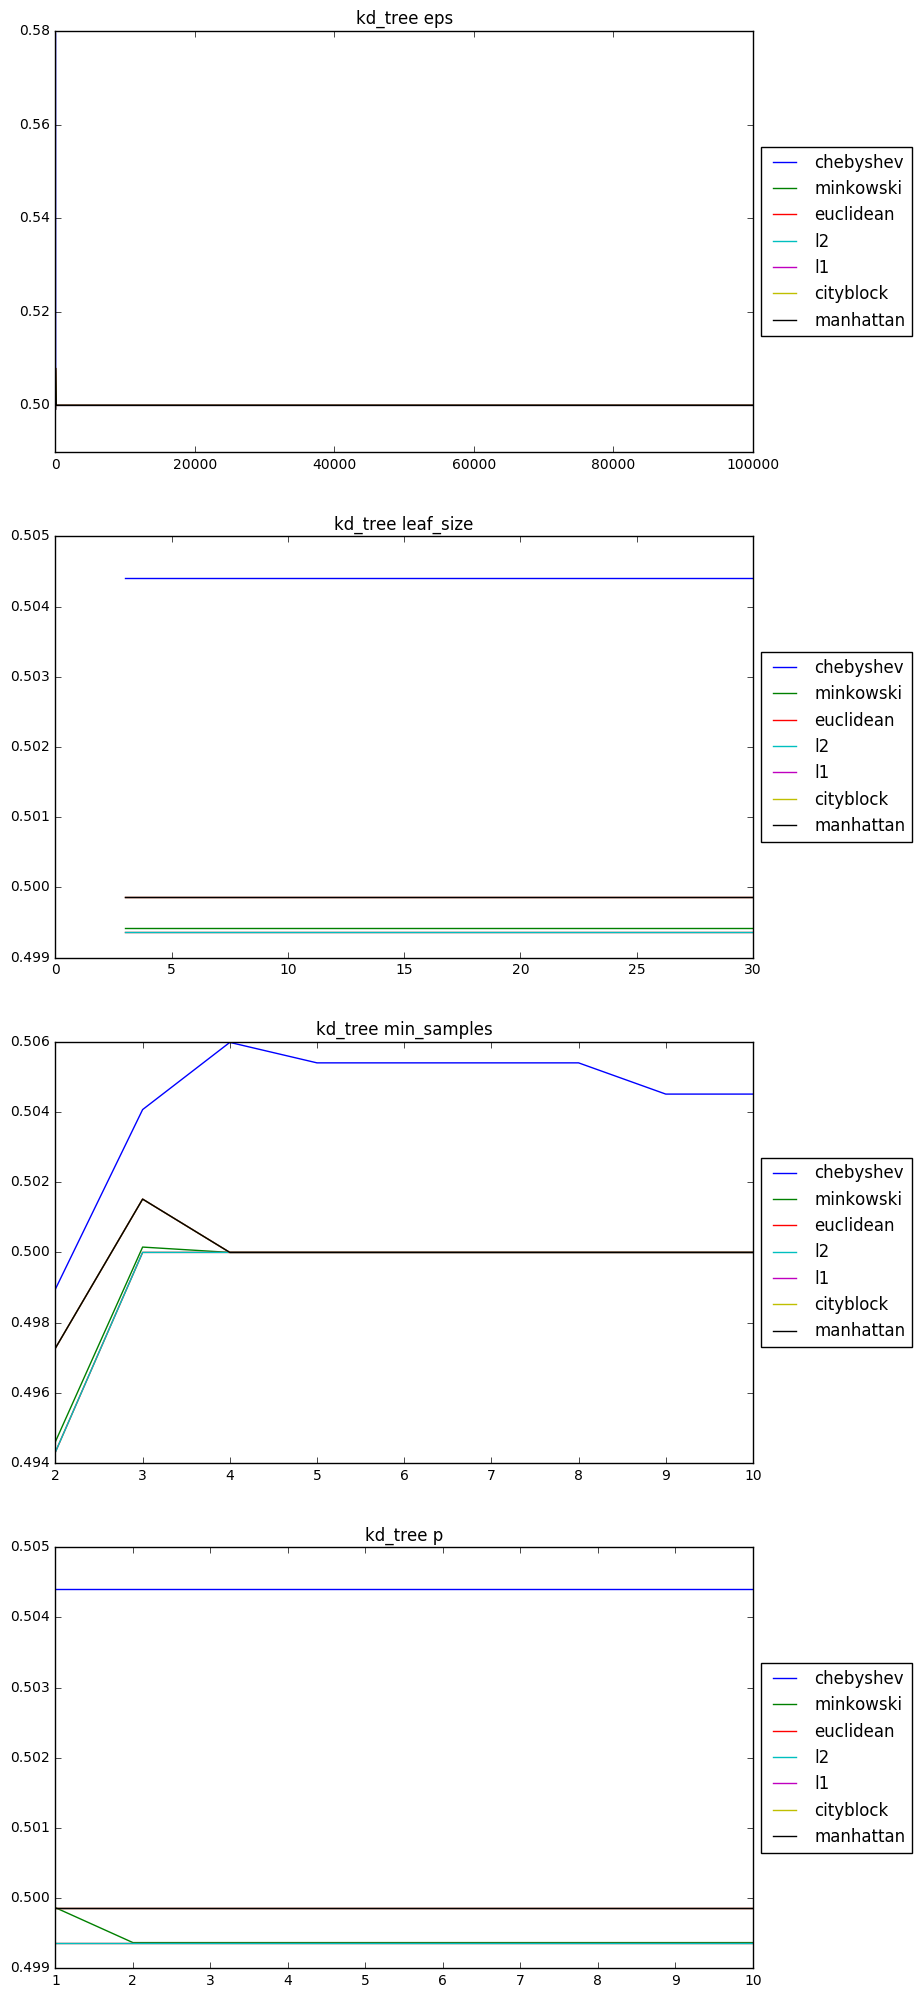

brute
possible metrics: [u'chebyshev', u'yule', u'sokalmichener', u'canberra', u'rogerstanimoto', u'matching', u'dice', u'braycurtis', u'russellrao', u'cosine', u'cityblock', u'l1', u'manhattan', u'jaccard', u'sqeuclidean', u'sokalsneath', u'kulsinski', u'minkowski', u'euclidean', u'l2', u'hamming', u'correlation']
generating plot for: eps
generating plot for: leaf_size
generating plot for: min_samples
generating plot for: p


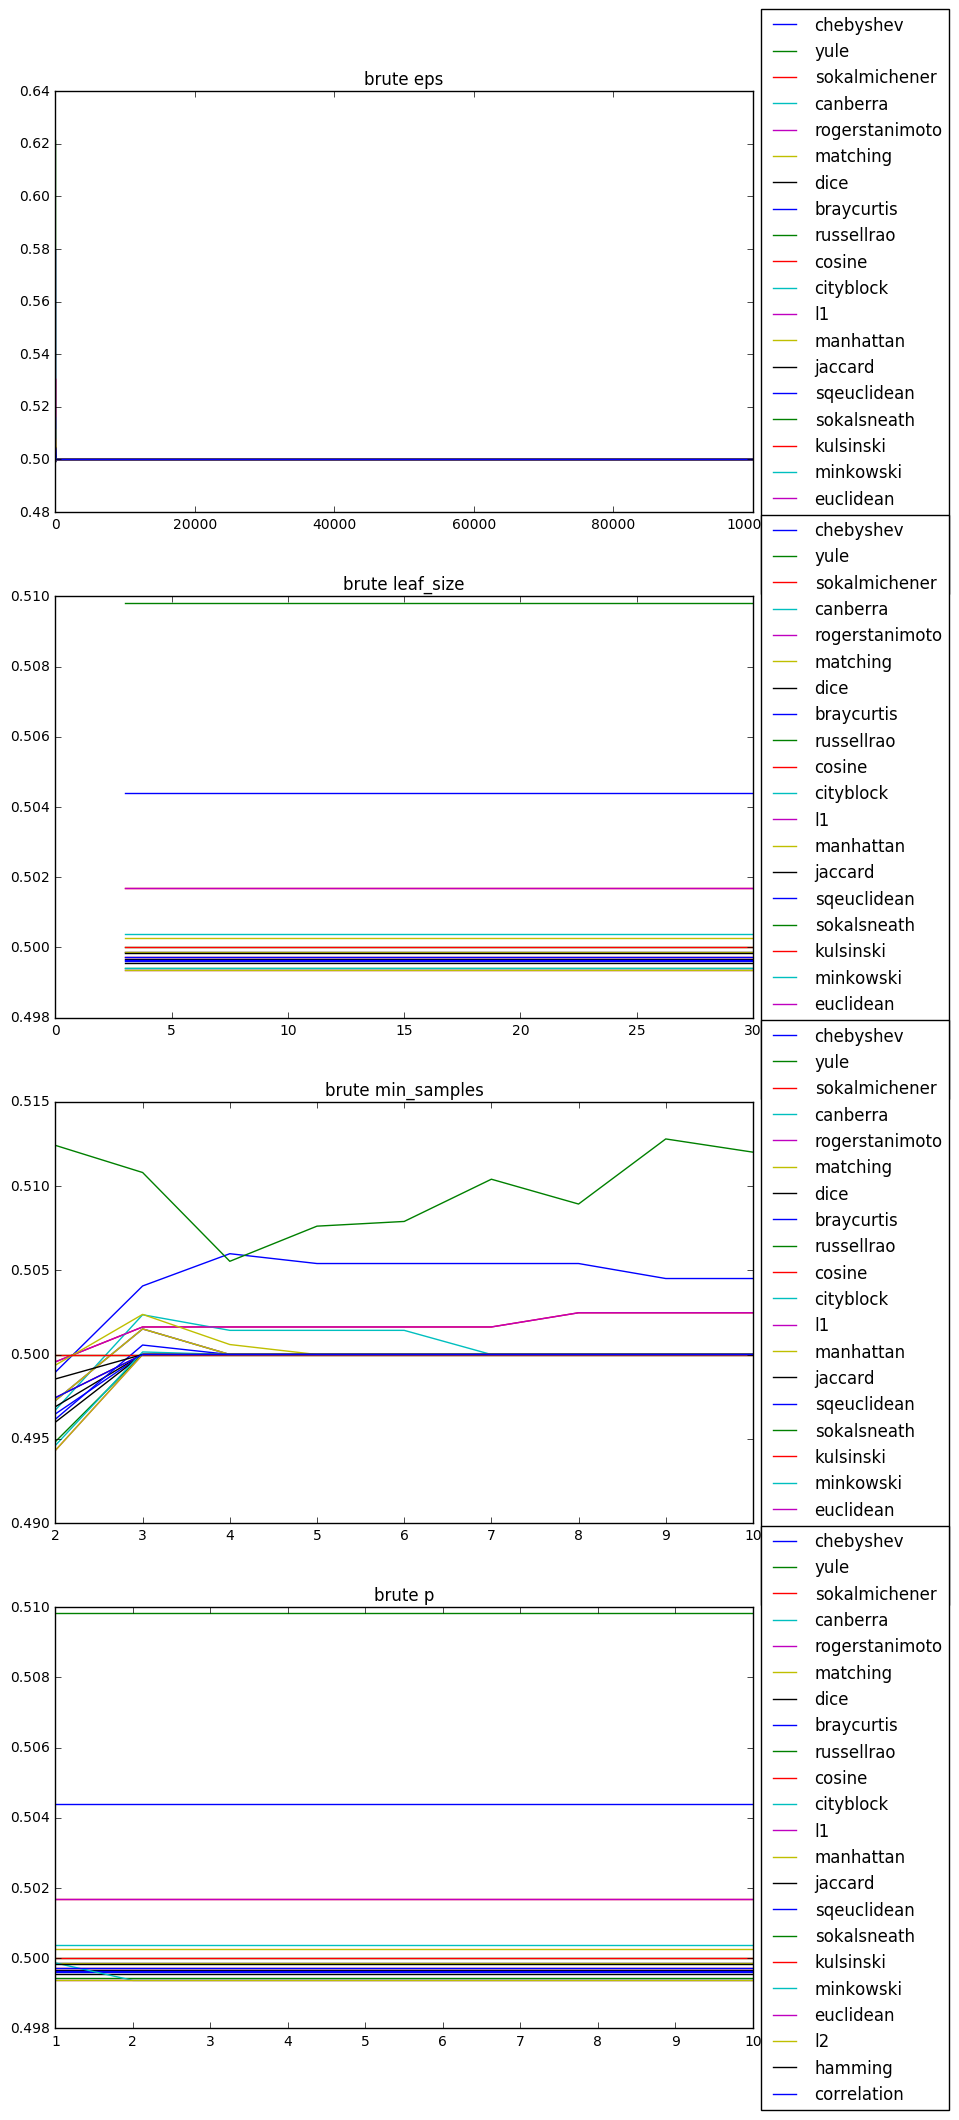

ball_tree
possible metrics: [u'kulsinski', u'chebyshev', u'sokalmichener', u'dice', u'canberra', u'jaccard', u'minkowski', u'braycurtis', u'matching', u'euclidean', u'russellrao', u'l2', u'hamming', u'l1', u'sokalsneath', u'cityblock', u'rogerstanimoto', u'manhattan']
generating plot for: eps
generating plot for: leaf_size
generating plot for: min_samples
generating plot for: p


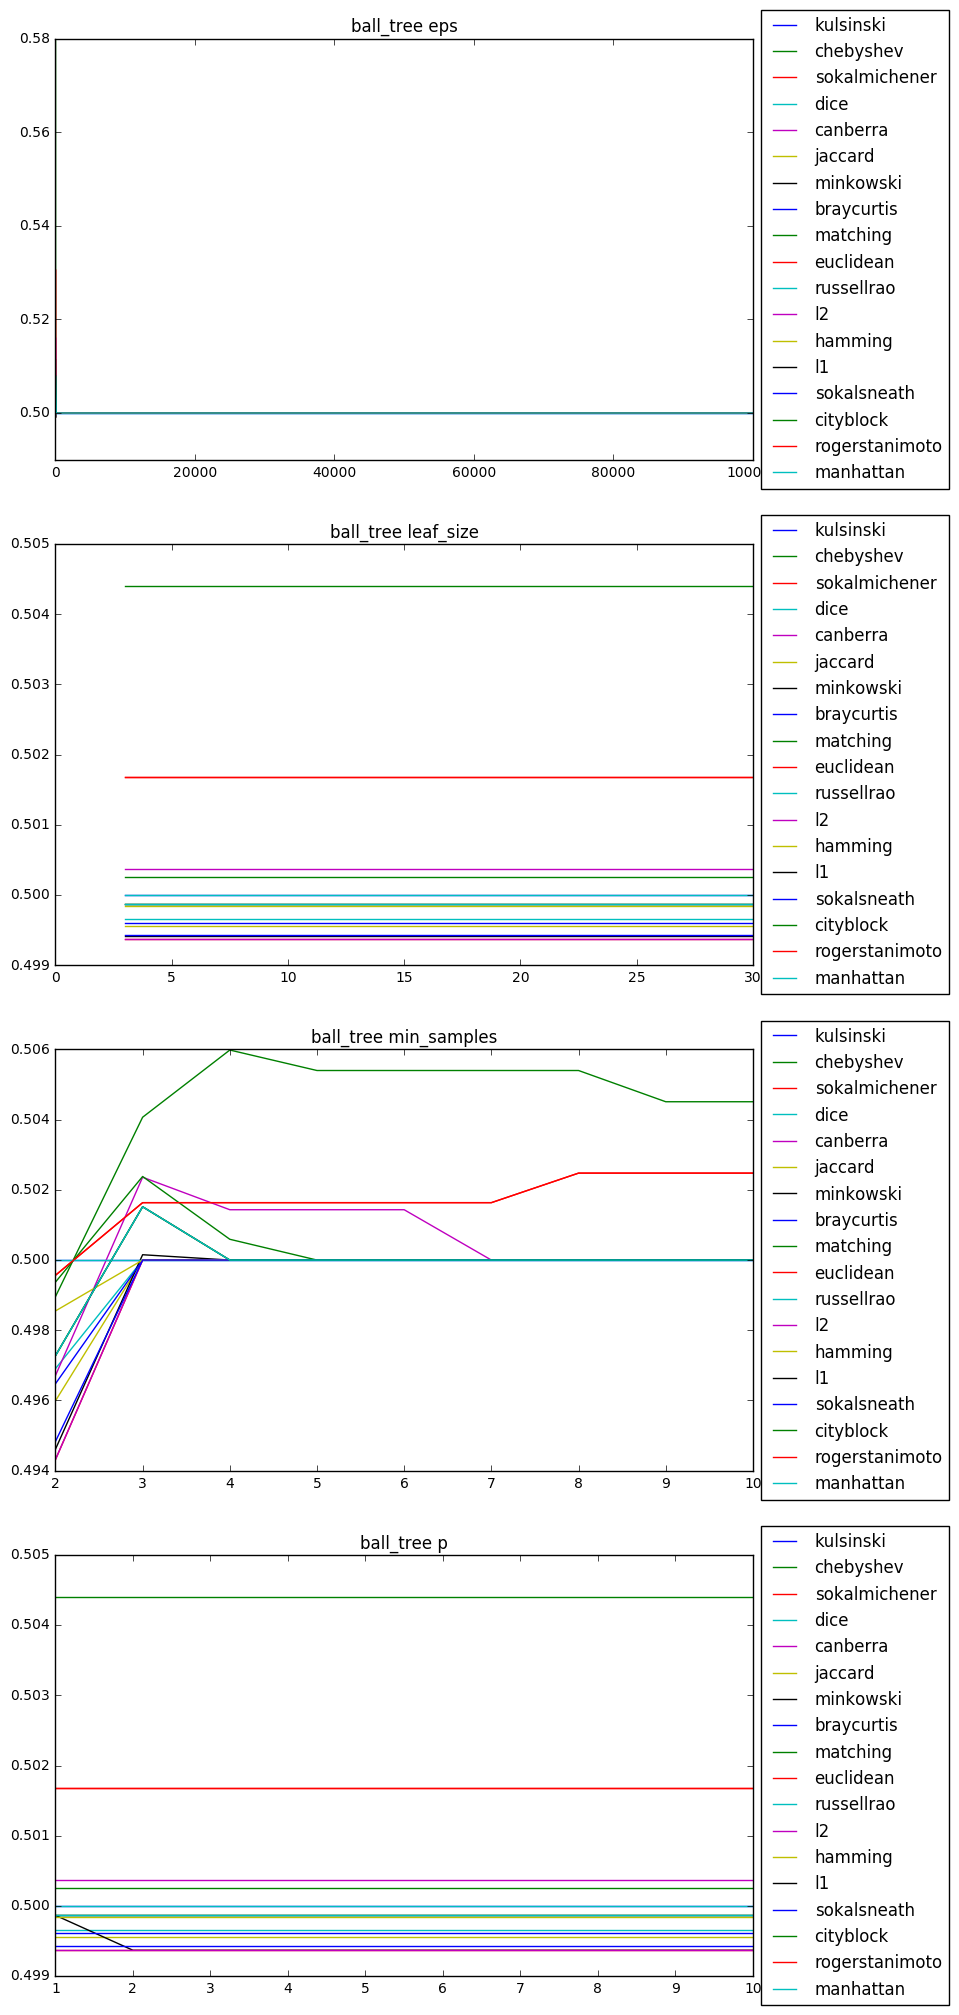

In [12]:
variables = ['eps', 'leaf_size', 'min_samples', 'p']
for algorithm in results.keys():
    print algorithm
    metrics = results[algorithm].keys()
    print 'possible metrics:', metrics
    plt.figure(figsize=(9,25))
    for enumerator, var in enumerate(variables):
        print 'generating plot for:', var
        sb_par = 411 + enumerator
        plt.subplot(sb_par)
        for metric in metrics:
            scores_per_var = {}
            for case in results[algorithm][metric]:
                if case[var] not in scores_per_var.keys():
                    scores_per_var[case[var]] = [case['result']]
                else:
                    scores_per_var[case[var]].append(case['result'])
            x_var = []
            y_score = []
            for key in sorted(scores_per_var.keys()):
                x_var.append(key)
                y_score.append(np.mean(scores_per_var[key]))
            plt.plot(x_var, y_score)
        plt.legend(metrics, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(str(algorithm)+' '+str(var))
    plt.show()

In [9]:
print results['kd_tree'].keys()

[u'chebyshev', u'minkowski', u'euclidean', u'l2', u'l1', u'cityblock', u'manhattan']


In [1]:
print 